# HW 2



### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/admissions.csv"
df_raw = pd.read_csv(url)
df_raw.head(100)

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
len(df_raw)

400

Answer: 400

#### Question 2. Create a summary table

In [4]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: they are on different scales. gre_min = 220 gre_max = 800 and gpa_min = 2.26 gpa_max = 4.00

#### Question 4. Drop data points with missing data


In [5]:
df_raw.dropna(inplace = True)

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [6]:
len(df_raw.isnull())
# 400 - 397 = 3 

397

#### Question 6. Create box plots for GRE and GPA

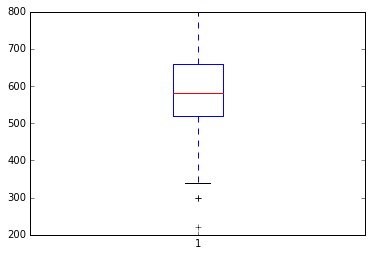

In [9]:
#boxplot 1 GRE
plt.boxplot([df_raw['gre']])
plt.show()

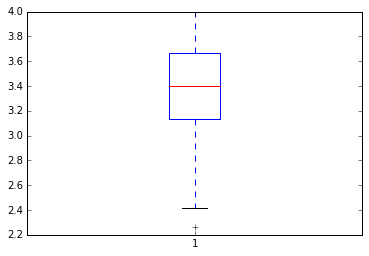

In [10]:
#boxplot 2 GPA
plt.boxplot([df_raw['gpa']])
plt.show()

#### Question 7. What do these plots show?

Answer: they both have a couple of lower outliers, on very different scales 

#### Question 8.  If our model had an assumption of a symmetric distribution would we meet that requirement? 

Answer: yeah they both seem to be symmetrically distributed 

#### Question 9: Add dummy variables for GRE scores. Top 10% are considered very high. next 25% of GRE scores are considered high, next 50% are considered medium and lowest 15% are considered Low. 

In [26]:
df_raw['gre_dummy'] = 'low'

very_high = (df_raw.gre >= df_raw.gre.quantile(0.9))
high = ((df_raw.gre < df_raw.gre.quantile(0.9)) & (df_raw.gre >= df_raw.gre.quantile(0.65)))
medium = ((df_raw.gre < df_raw.gre.quantile(0.65)) & (df_raw.gre >= df_raw.gre.quantile(0.15)))

df_raw.loc[very_high, 'gre_dummy'] = 'very_high'
df_raw.loc[high, 'gre_dummy'] = 'high'
df_raw.loc[medium, 'gre_dummy'] = 'medium'

GREDummy = pd.get_dummies(df_raw.gre_dummy)
del GREDummy['low']

df_raw = pd.concat([df_raw, GREDummy],axis = 1)
df_raw.head()

,admit,gpa,gre,gre_dummy,prestige,high,medium,very_high
0,0.0,3.61,380.0,low,3.0,0.0,0.0,0.0
1,1.0,3.67,660.0,high,3.0,1.0,0.0,0.0
2,1.0,4.00,800.0,very_high,1.0,0.0,0.0,1.0
3,1.0,3.19,640.0,high,4.0,1.0,0.0,0.0
4,0.0,2.93,520.0,medium,4.0,0.0,1.0,0.0


#### By a scatterplot explore the association between GRE based on GPA. For each observation, color according to perstige. 

In [28]:
plt.scatter(df_raw.gre[df.prestige == 1], df_raw.gpa[df.prestige == 1], color = 'r', label = 'Prestige 1')
plt.scatter(df_raw.gre[df.prestige == 2], df_raw.gpa[df.prestige == 2], color = 'b', label = 'Prestige 2')
plt.scatter(df.gre[df.prestige == 3], df.gpa[df.prestige == 3], color = 'y', label = 'Prestige 3')
plt.scatter(df.gre[df.prestige == 4], df.gpa[df.prestige == 4], color = 'g', label = 'Prestige 4')

plt.show()

NameError: name 'df' is not defined